In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import glob

In [46]:
flist = glob.glob('*.csv')
data = {file[:-4]: pd.read_csv(file, index_col=0) for file in flist}

data['FRET/CFP'] = data['FRET']/data['CFP']


df = data['label']
df['FRET/CFP'] = data['FRET/CFP'].values
df['RFP'] = data['RFP'].values
df = df.drop('Mean',axis=1)
df = df.drop('Slice',axis=1)

labels = df['Label'].values
labels_crop = [labels[i][25:-8] for i in range(labels.shape[0])]
df['Label'] = labels_crop

print(data.keys())

df

dict_keys(['CFP-HS351-full', 'CFP', 'FRET-HS351-full', 'FRET', 'HS351-CFP', 'HS351-FRET', 'HS351-RFP', 'label', 'RFP-HS351-full', 'RFP', 'FRET/CFP'])


Label  FRET/CFP      RFP
                               
1      HS351  1.546508  363.058
2      HS351  1.460634  151.012
3      HS351  1.593074  429.257
4      HS351  1.872101  388.668
5      HS351  1.397821   83.423
...      ...       ...      ...
5085  YG1392  1.698528   61.135
5086  YG1392  1.769105   84.852
5087  YG1392  1.532653  154.008
5088  YG1392  1.606413   84.632
5089  YG1392  1.785856   70.442

[5089 rows x 3 columns]

In [41]:
label_set = sorted(list(set(df['Label'].values)))
label_set

['HS351',
 'YG1369',
 'YG1370',
 'YG1371',
 'YG1372',
 'YG1373',
 'YG1374',
 'YG1375',
 'YG1376',
 'YG1377',
 'YG1381',
 'YG1390',
 'YG1391',
 'YG1392']

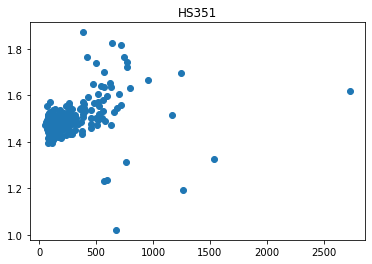

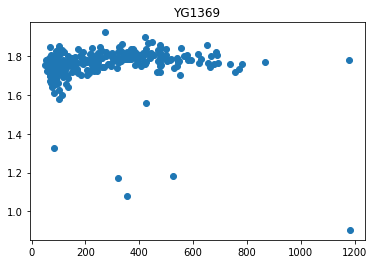

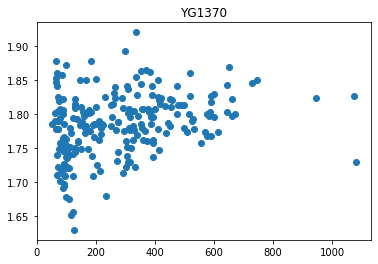

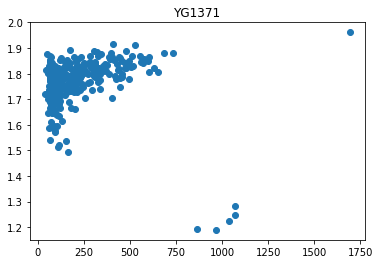

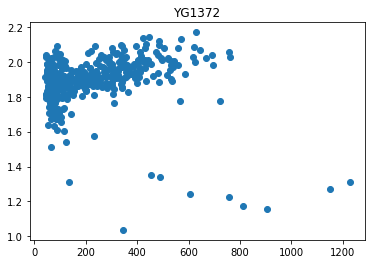

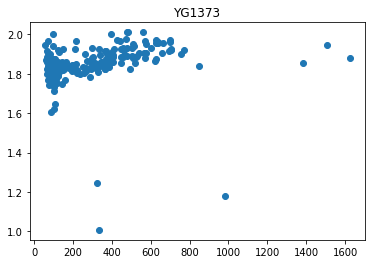

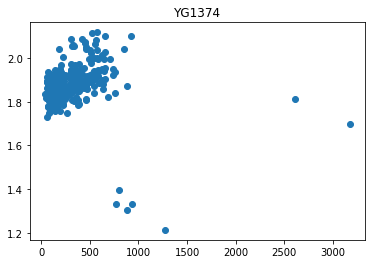

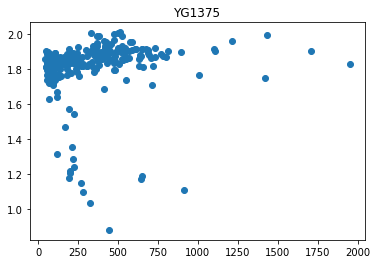

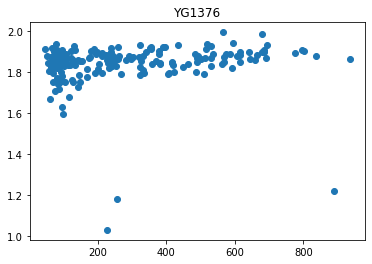

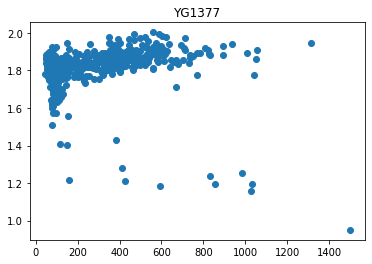

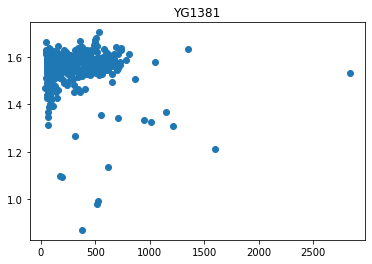

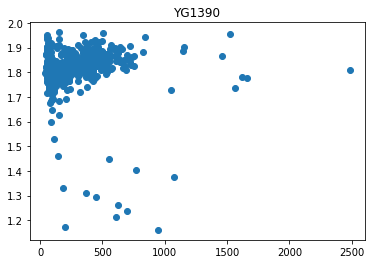

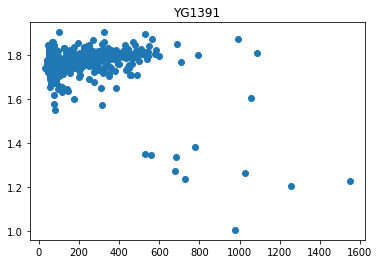

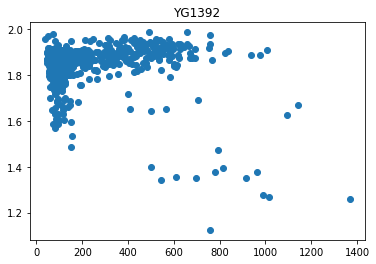

In [54]:
for label in label_set:
    tmp = df.loc[df['Label']==label,:]
    plt.figure()
    plt.scatter(tmp['RFP'],tmp['FRET/CFP'])
    plt.xlim(0,1000)
    plt.ylim(1.2,2.2)
    plt.title(label)
    plt.show()

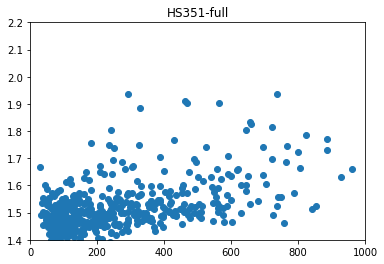

In [52]:
plt.figure()
plt.scatter(data['RFP-HS351-full'], data['FRET-HS351-full']/data['CFP-HS351-full'])
plt.xlim(0,1000)
plt.ylim(1.4,2.2)
plt.title('HS351-full')
plt.show()

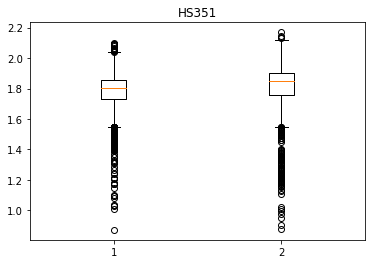

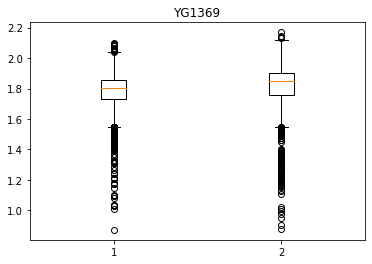

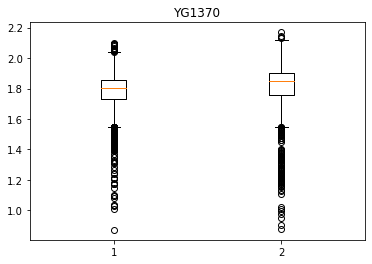

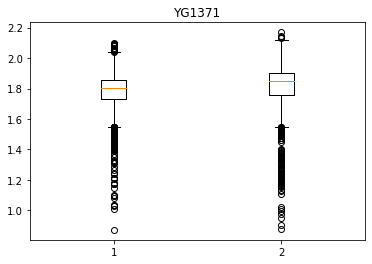

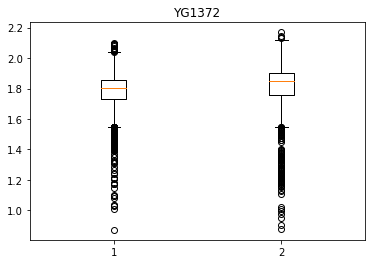

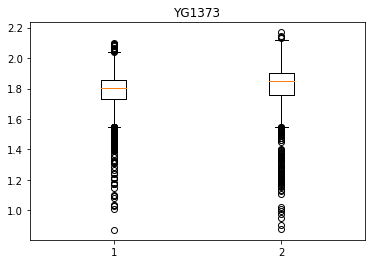

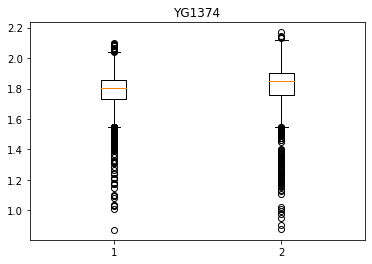

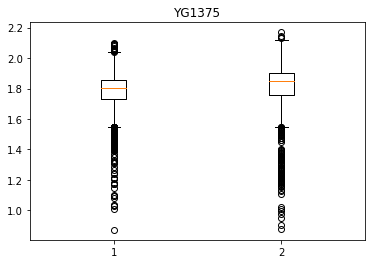

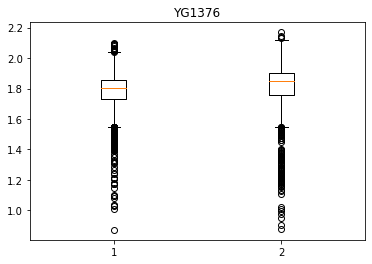

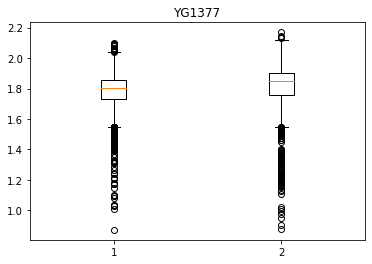

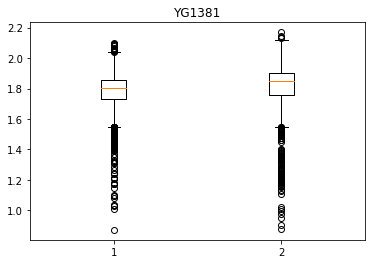

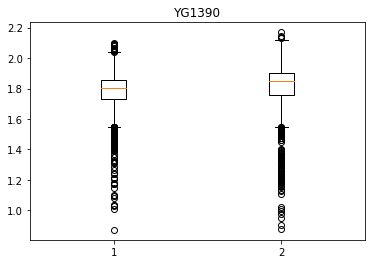

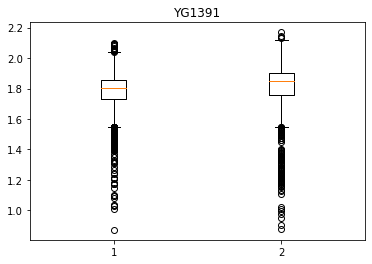

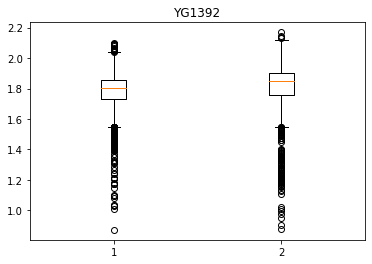

In [53]:
for label in label_set:
    tmp = df.loc[df['Label']==label,:]
    tmp_high = df.loc[df['RFP'] > 400,:]
    tmp_low = df.loc[df['RFP'] < 400,:]
    plt.figure()
    plt.boxplot([tmp_low['FRET/CFP'], tmp_high['FRET/CFP']])
    plt.title(label)
    plt.show()